Medical Insurance cost Prediction

Using LinearRegression() - ML model

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [4]:
insurance_dataset = pd.read_csv('/Machine_Learning/Dataset/insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_dataset.shape

(1338, 7)

In [8]:
#getting some number about the dataset

insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Figure size 600x600 with 0 Axes>

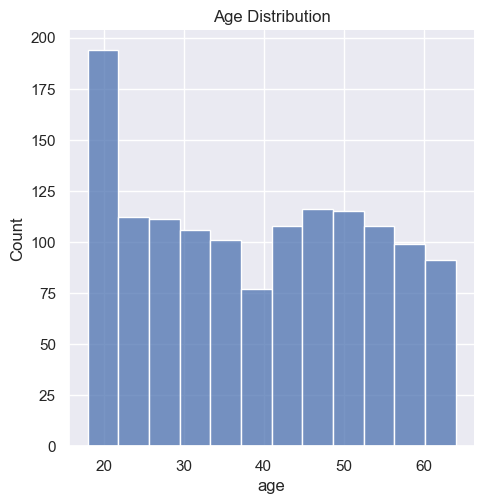

In [10]:
#distribution of age valuess..

sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

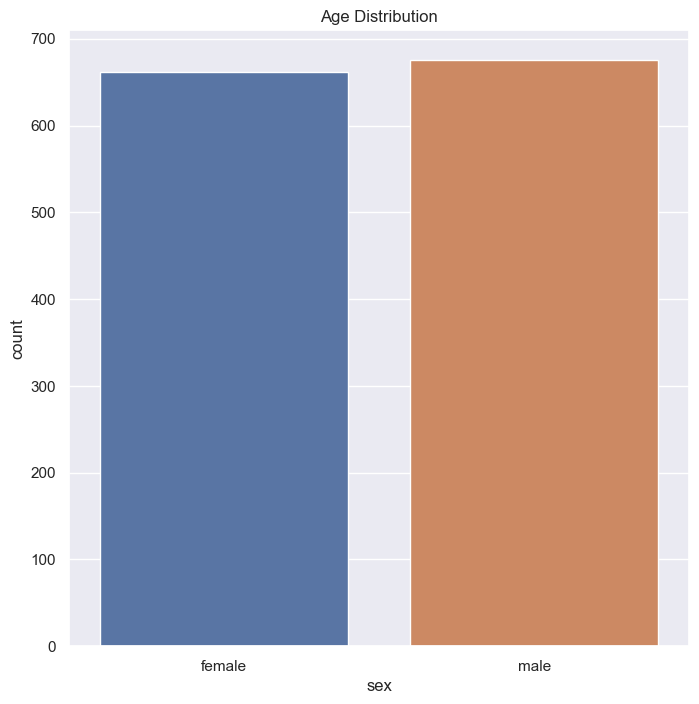

In [11]:
#Gender Column

plt.figure(figsize=(8,8))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Age Distribution')
plt.show()

In [12]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x600 with 0 Axes>

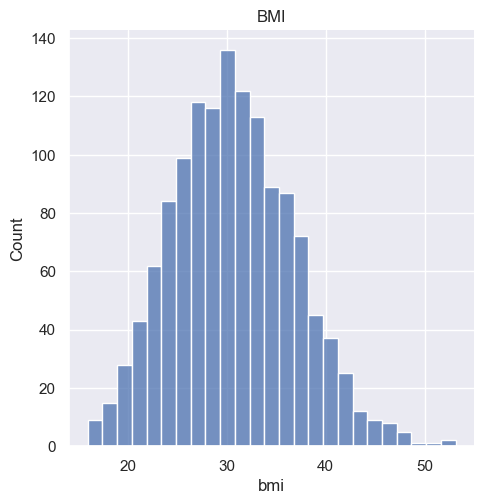

In [13]:
#bmi distribution

plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI')
plt.show()

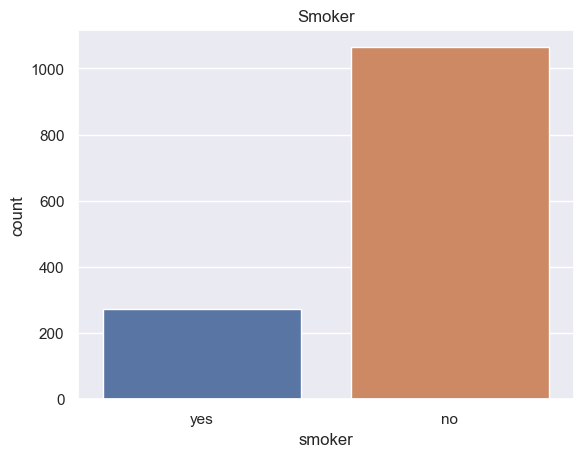

In [14]:
#smoke distributionn

sns.countplot(x='smoker', data=insurance_dataset)
plt.title('Smoker')
plt.show()

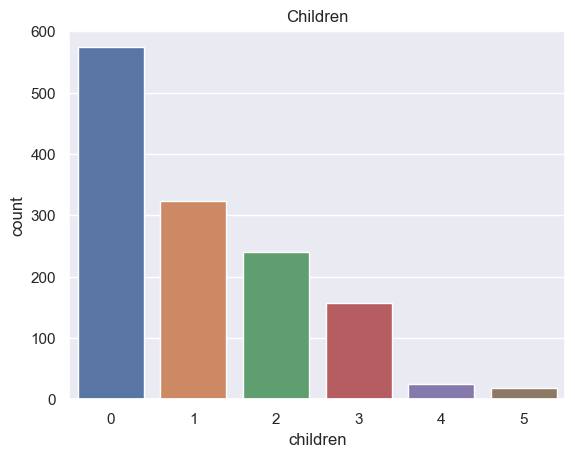

In [15]:
#children distributionn..

sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [16]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [17]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

encoding the datasetsss

In [20]:
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace = True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

Splitting the feature target

In [21]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [24]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [65]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=20)

In [64]:
model = LinearRegression()

In [66]:
model.fit(X_train,Y_train)

LinearRegression()

In [67]:
model.score(X_test,Y_test)

0.796189914155549

In [52]:
# prediction on training data
training_data_prediction =model.predict(X_train)

In [53]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7381729420693834


In [54]:
# prediction on test data
test_data_prediction =model.predict(X_test)

In [55]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.796189914155549


In [56]:
model.predict([[19, 1,27.900, 0 ,0 ,1]])

c:\Users\MOHIT RANJAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25655.42979912])